# Importing Libraries

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Importing Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Global%20Power%20Plant%20Database/database_IND.csv")

In [3]:
# printing the first 5 4rows of the dataset
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
# printing dimensions of the dataset
df.shape

(907, 27)

This dataset contains 907 rows and 27 columns.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        533 non-null    float64
 12  owner                     344 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Some of feature are with object datatypes and other with float.

other_fuel3, estimated_generation_gwh, wepp_id, other_fuel2 are empty columns.

## Remove empty columns and Non Relevalent Columns.

In [6]:
# removing empty columns and non-relevant columns
df.drop(columns=["country","country_long",'url','year_of_capacity_data','gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [7]:
# checking for missing value
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        374
source                      0
geolocation_source         19
generation_gwh_2013       461
generation_gwh_2014       503
generation_gwh_2015       479
generation_gwh_2016       467
generation_gwh_2017       461
generation_gwh_2018       454
generation_gwh_2019       906
generation_data_source    453
dtype: int64

## Missing value Impuatation

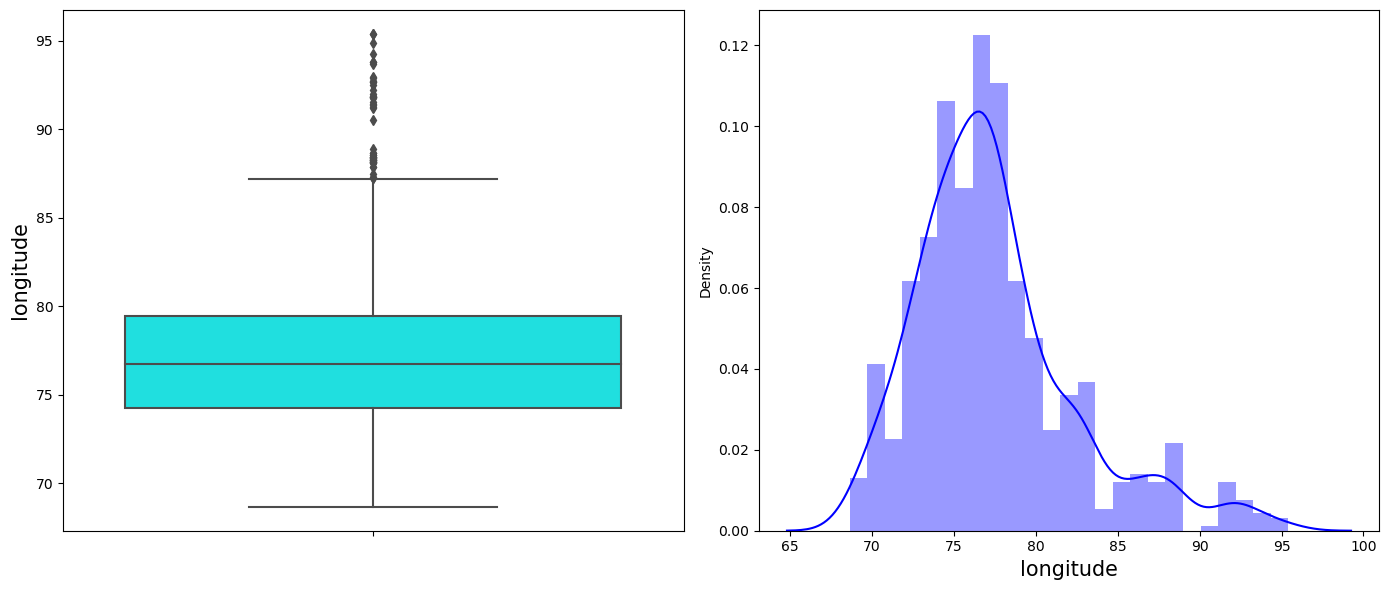

In [8]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='blue')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

### Based on presense of outliers we will impute longitude we with median.

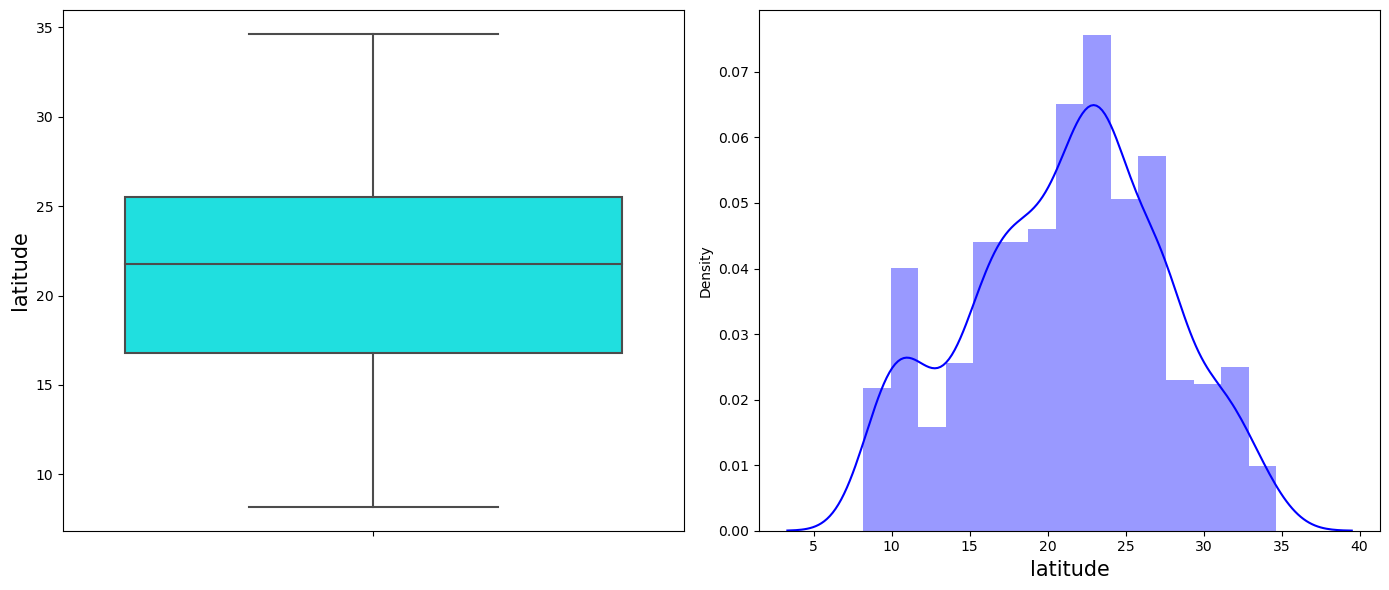

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='blue')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

### Based on absense of outliers we will impute latitude we with mean.

In [10]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [11]:
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

In [12]:
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [13]:
# Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
generation_gwh_2019                906       99.889746
other_fuel1                        709       78.169791
generation_gwh_2014                503       55.457552
generation_gwh_2015                479       52.811466
generation_gwh_2016                467       51.488423
generation_gwh_2017                461       50.826902
generation_gwh_2013                461       50.826902
generation_gwh_2018                454       50.055127
generation_data_source             453       49.944873
commissioning_year                 374       41.234840
name                                 0        0.000000
capacity_mw                          0        0.000000
source                               0        0.000000
primary_fuel                         0        0.000000
longitude                            0        0.000000
latitude                             0        0.000000
geolocation_source                   0        0.000000


## Statstical Matrix

In [14]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,533.000000,446.000000,404.000000,428.000000,440.000000,446.000000,453.000000
mean,326.223755,21.197918,77.427103,1997.078799,436.579872,2410.620062,2406.769148,2449.949567,2531.301939,2595.299215
std,590.085456,6.079148,4.815073,17.119477,1624.717598,4002.130125,4170.303340,4139.826108,4174.261177,4294.595169
min,0.000000,8.168900,68.644700,1927.000000,-947.600000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,0.688250,219.417762,180.793688,186.152062,178.397305,196.054800
50%,59.200000,21.281800,76.719500,2001.000000,14.264000,794.587100,697.450781,737.205450,817.977250,798.381000
75%,385.250000,25.176450,79.206100,2012.000000,138.133250,3014.967937,3020.045750,3269.942437,3263.677500,3139.308000
max,4760.000000,34.649000,95.408000,2018.000000,14779.303000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


Bigest Powerplant has power generation capacity of 4760 MW.

### We have two different Target feature for regression and classification model. LetStart exploring both Target Feature

## Regression Target feature - Capacity

### Before visualing feature let find details about Smallest & Biggest Powerplant

In [15]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [16]:
df.loc[df.capacity_mw==4760]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,11.354,27594.0,29047.0,30015.0,35116.0,35136.0,NaN,Central Electricity Authority


In [17]:
df.loc[df.capacity_mw==0]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW. As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.

Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.

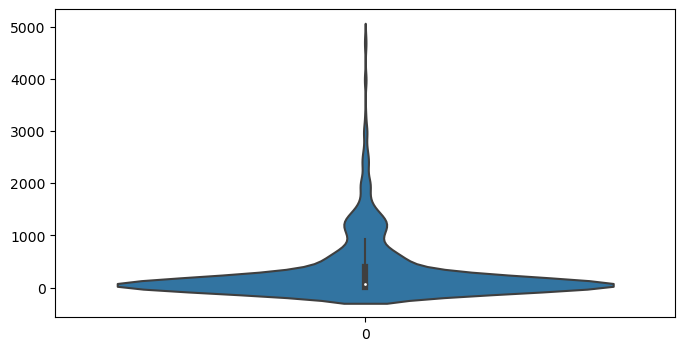

In [18]:
plt.figure(figsize=(8,4))
sns.violinplot(df.capacity_mw)
plt.show()

We can see there are very powerplant of capacity more than 1500 MW. Let's check.

In [19]:
df.loc[df.capacity_mw >1500].shape

(39, 17)

There only 17 powerplant of capacity more than 1500 MW.

In [20]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

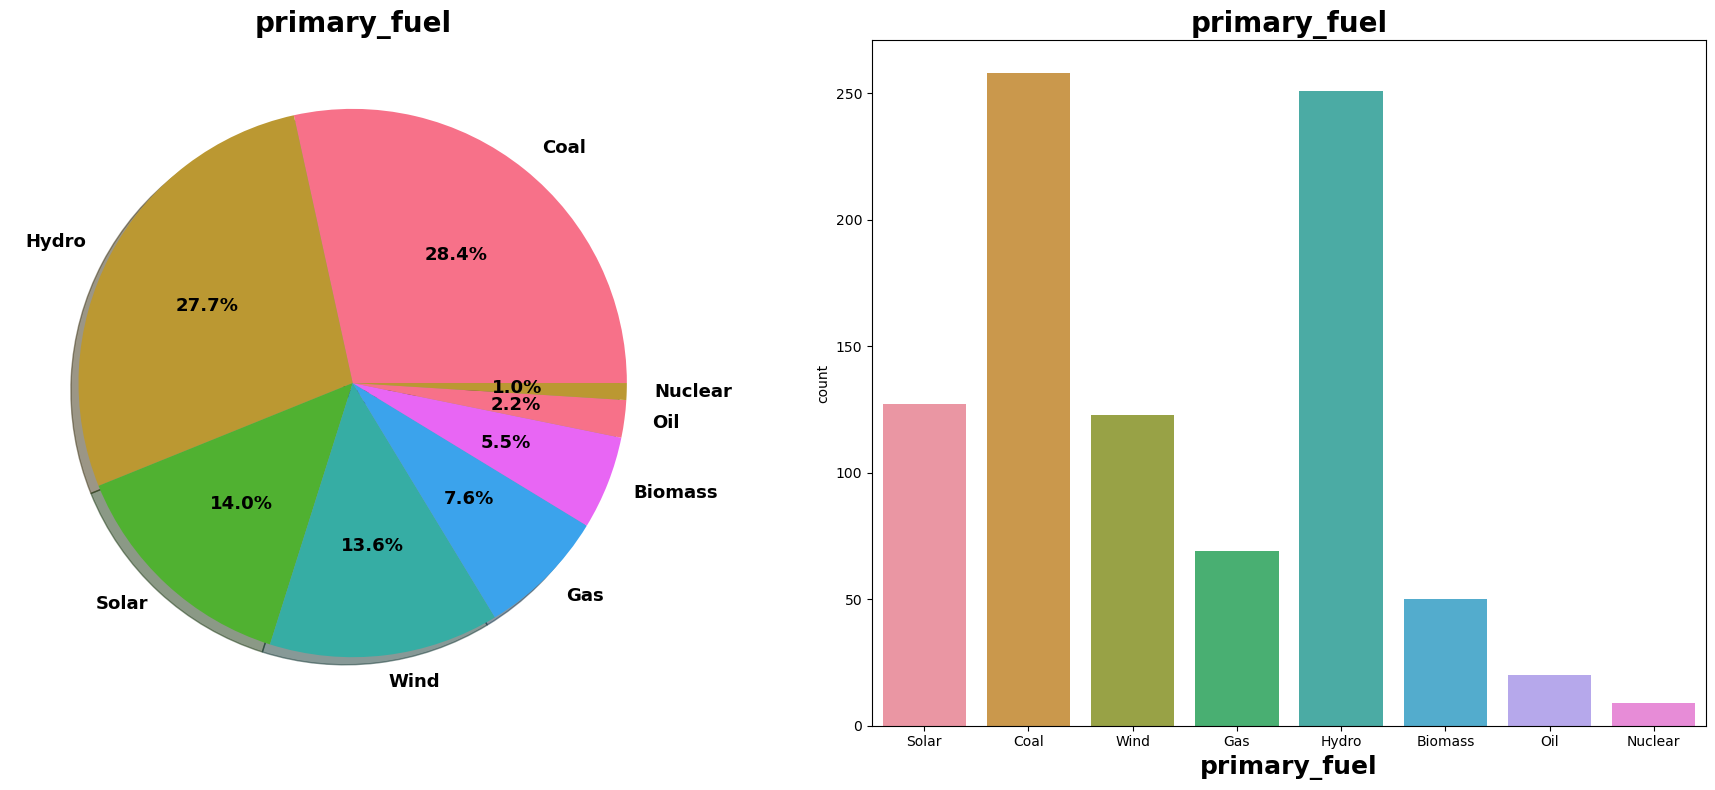

In [21]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot(x='primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [22]:
df.primary_fuel.value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.

There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity.

### Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.

In [23]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 295884.946 MW


##### India's Total Power Generation Capacity of is 295884.946 MW.

## Now Let check sector wise Capacity.

In [24]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


Out of Total PowerGeneration Maximum comes from Coal.

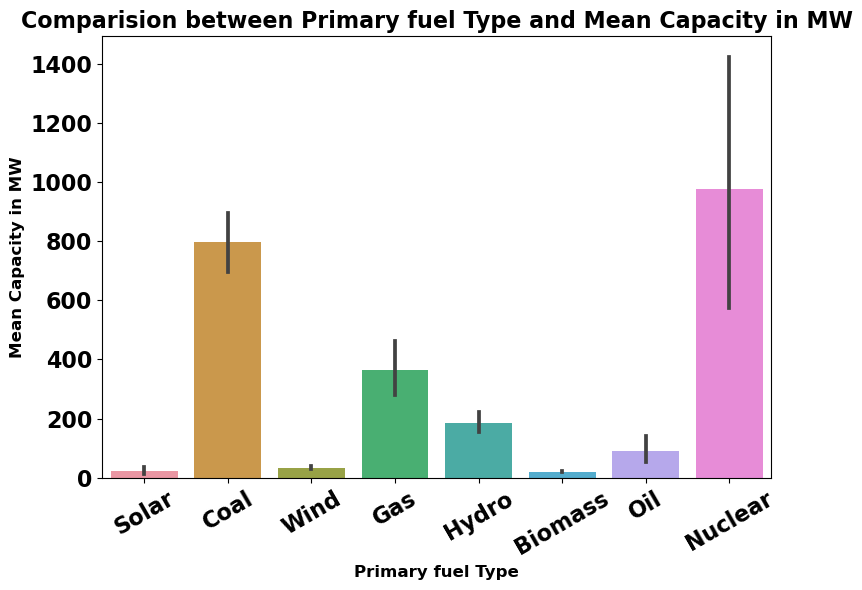

In [25]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (8,6))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in MW', fontsize=16, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=12,fontweight ='bold')
p.set_ylabel('Mean Capacity in MW',fontsize=12,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.

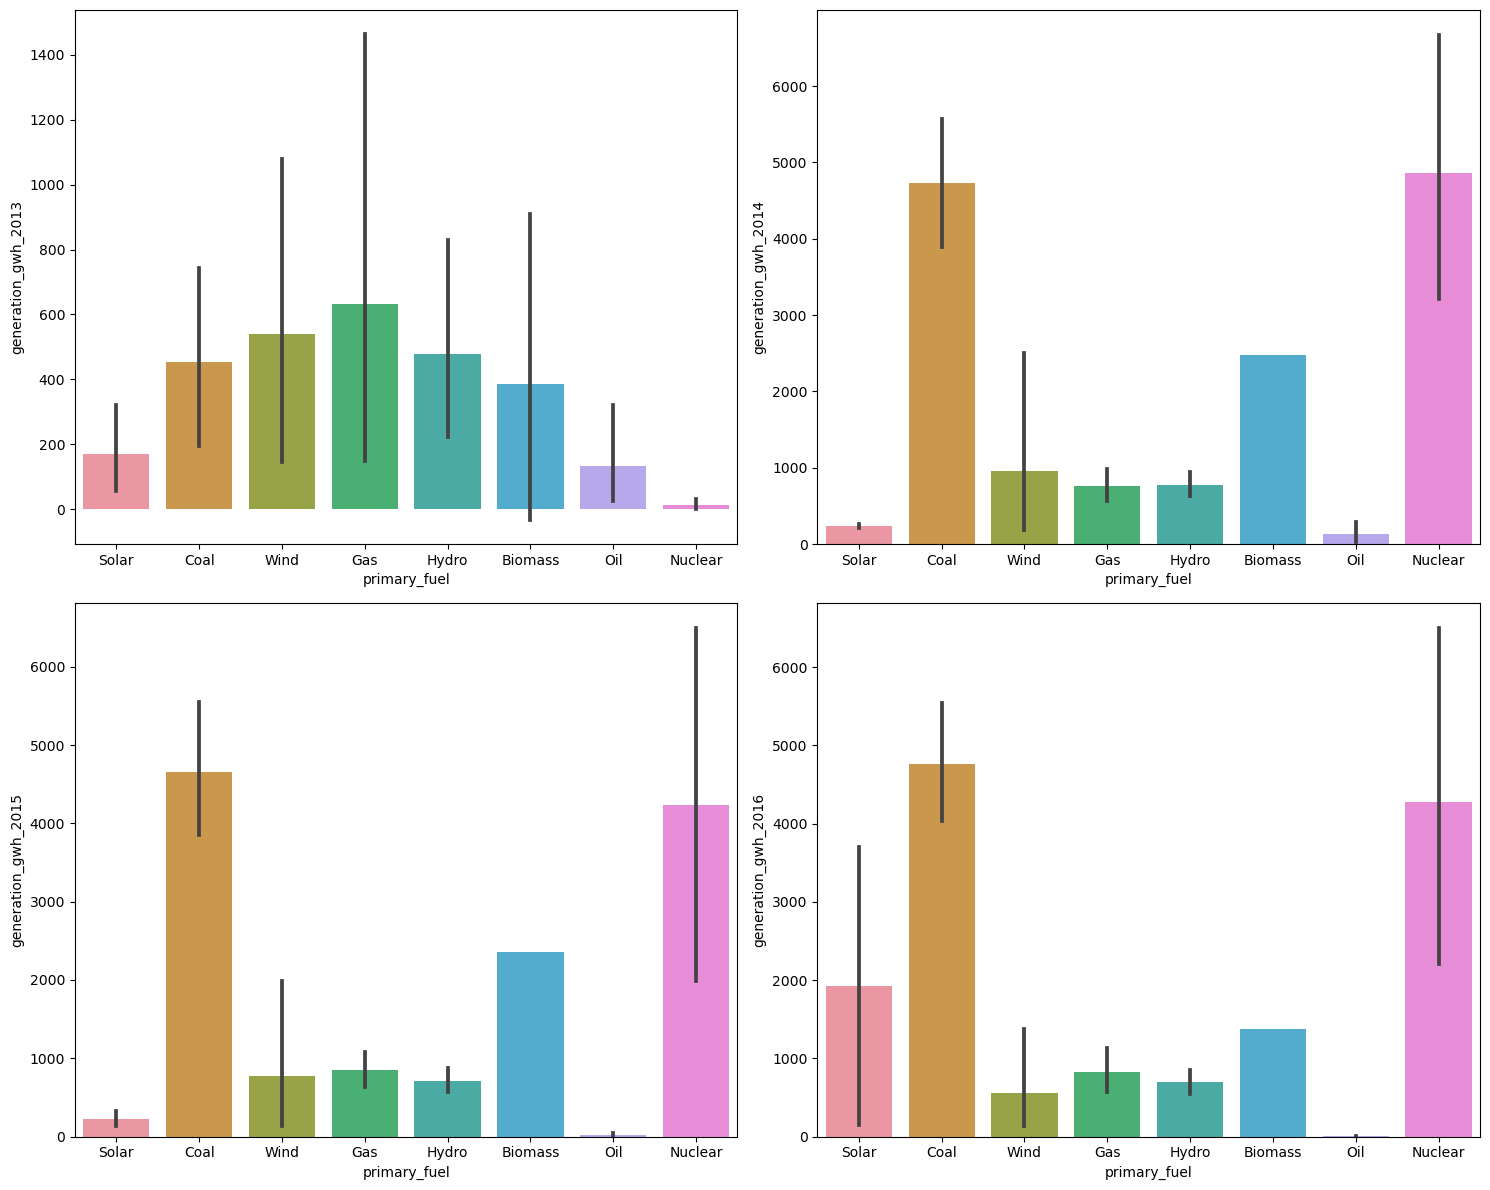

In [32]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df)

plt.show()


From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal. Reason is high efficieny of Nuclear powerplants.

Other fuel types have very less contribution to power generation.

## Location vs Primary Fuel

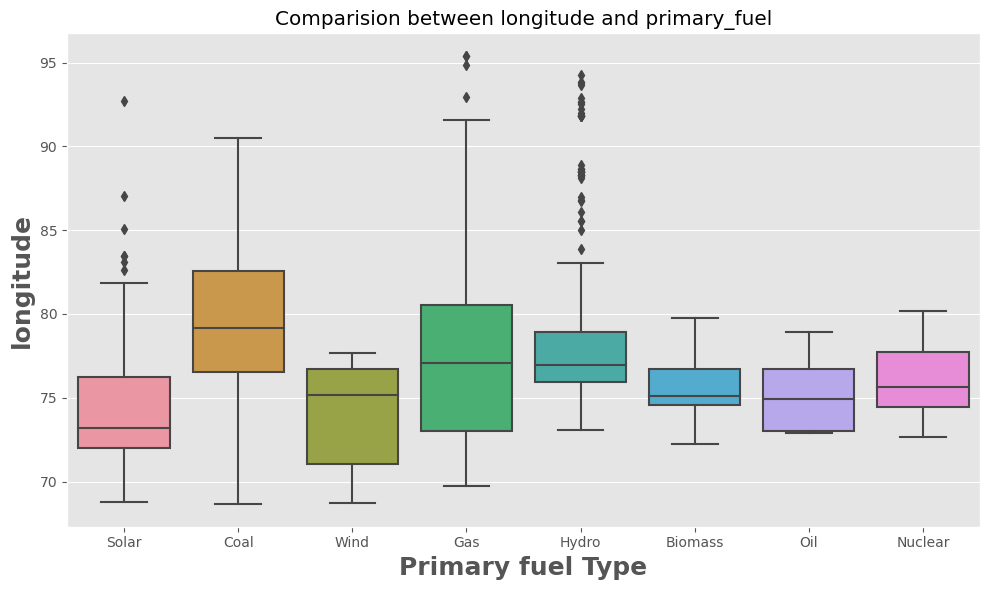

In [33]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel', y="longitude", data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

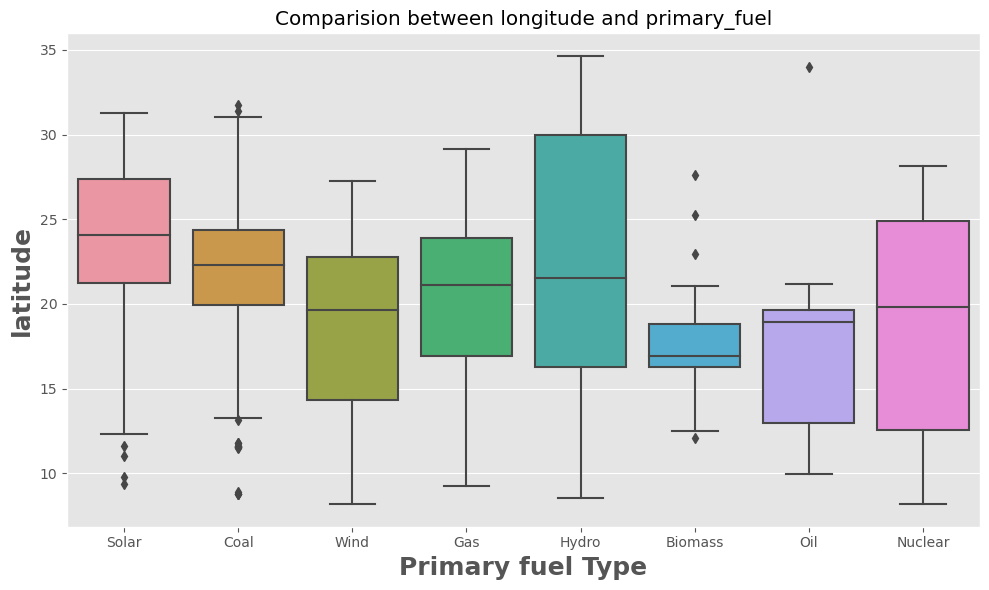

In [34]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(x='primary_fuel', y="latitude", data=df)
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.

We can also see solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

## Location vs Capacity

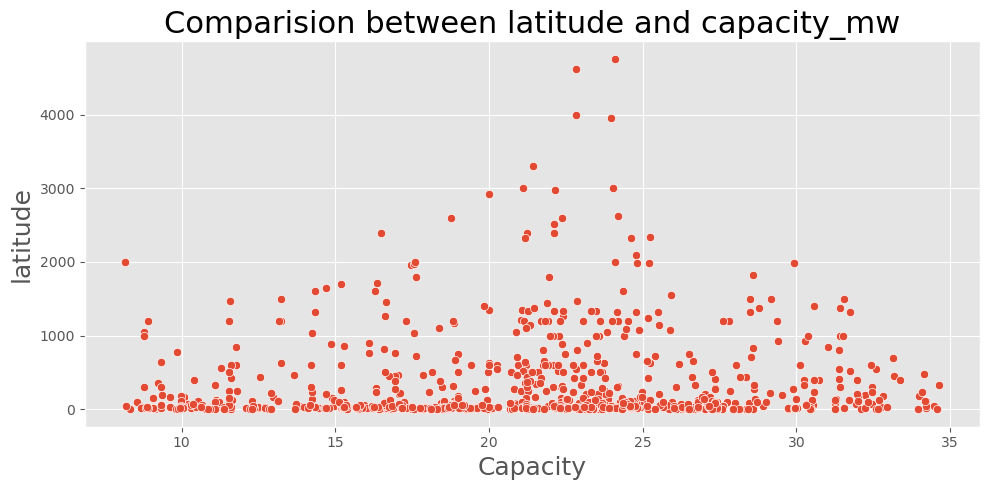

In [35]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,5])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22)
a= sns.scatterplot(x='latitude', y="capacity_mw", data=df)
a.set_xlabel('Capacity',fontsize=18)
a.set_ylabel('latitude',fontsize=18)
plt.show()

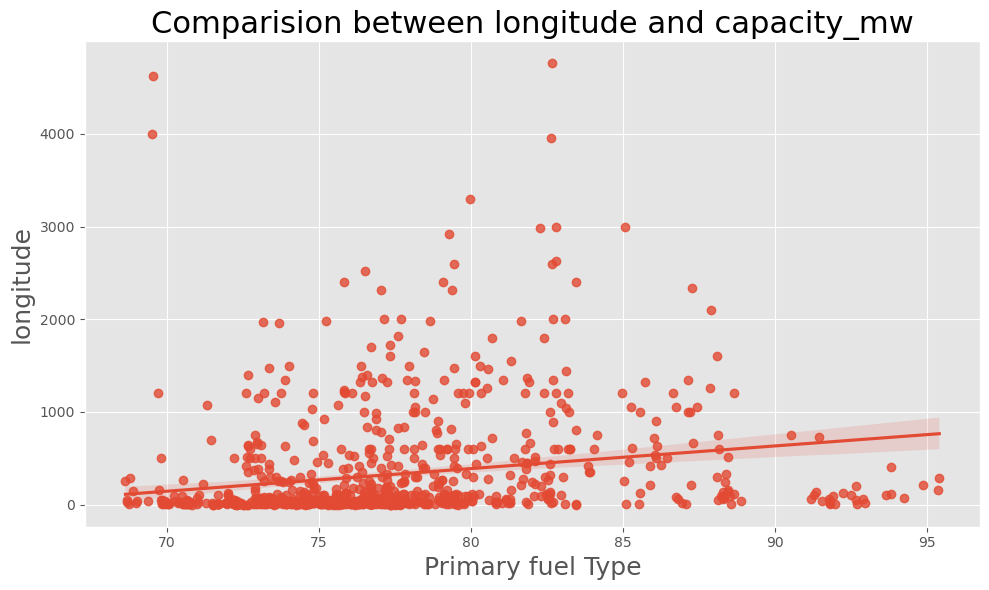

In [36]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22)
a= sns.regplot(x='longitude', y="capacity_mw", data=df)
a.set_xlabel('Primary fuel Type',fontsize=18)
a.set_ylabel('longitude',fontsize=18)
plt.show()

Nothing significant insight gain from above plots.

### Commission age vs primary fuel

In [37]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [38]:
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [39]:
df.loc[df.Power_plant_age==91]

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,Power_plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,NaN,220.82035,215.3777,144.4143,175.92595,282.76905,NaN,Central Electricity Authority,91.0


Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.

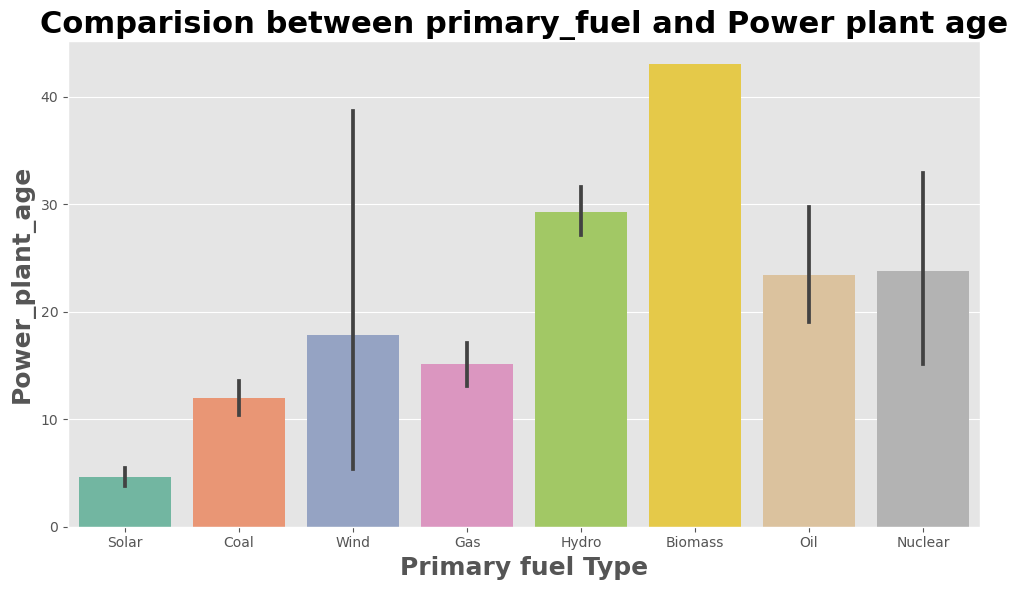

In [40]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<Axes: title={'center': 'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

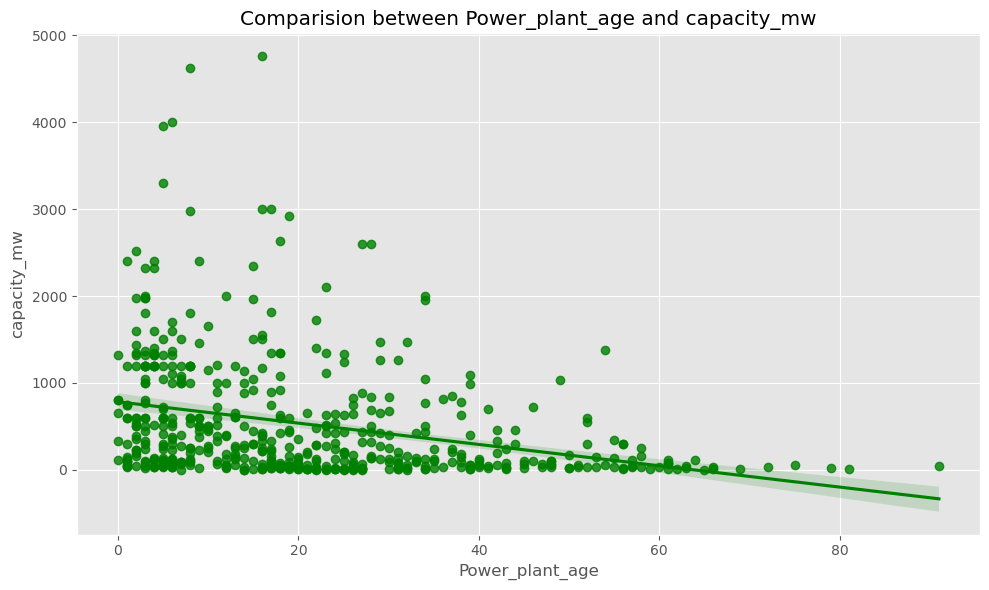

In [41]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(x='Power_plant_age', y='capacity_mw', data=df,color = "g")

There is negative linear relationship between feature and label.

We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

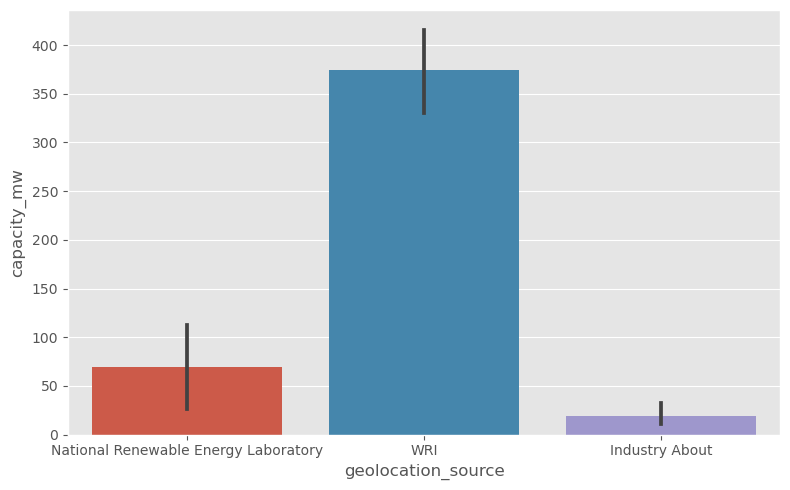

In [42]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (8,5))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

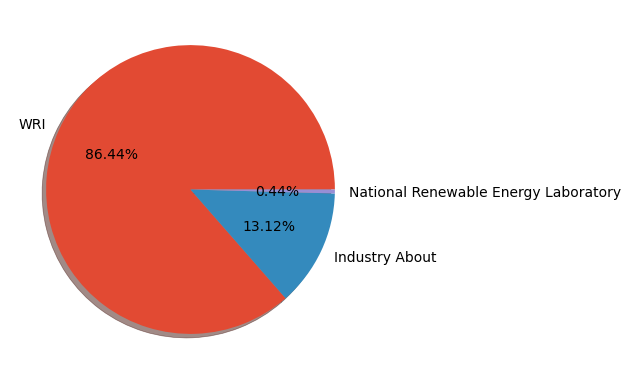

In [43]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

## Distribution of features

In [44]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

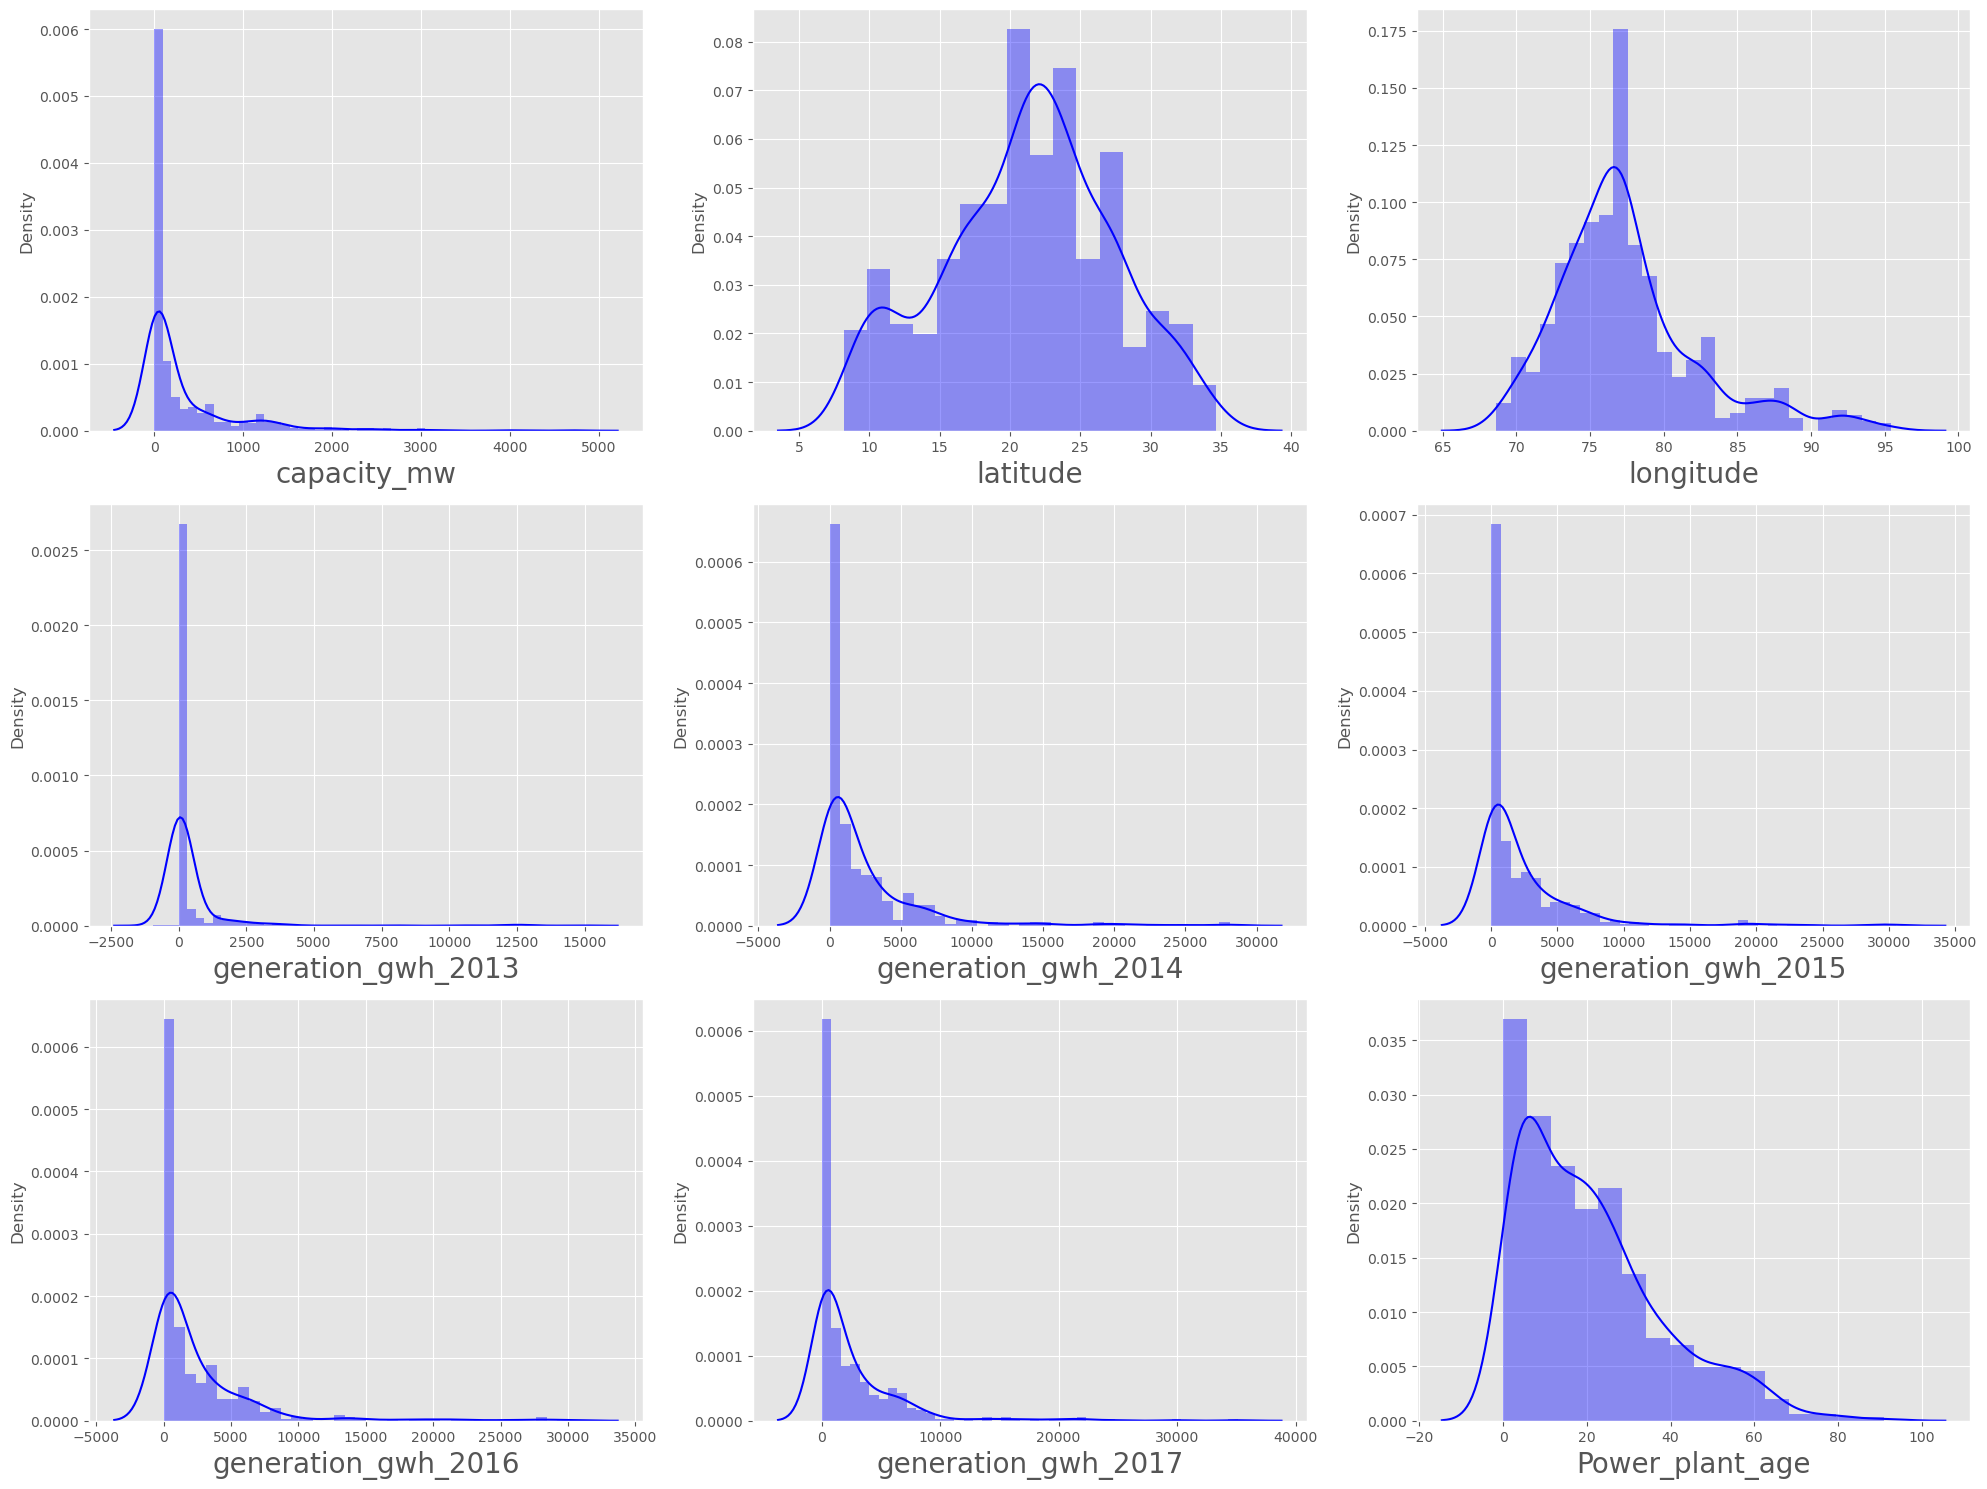

In [47]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.

In most of the columns the mean is greater than the median which means they are skewed to right.

We will remove the skewness in all these columns except the label later.

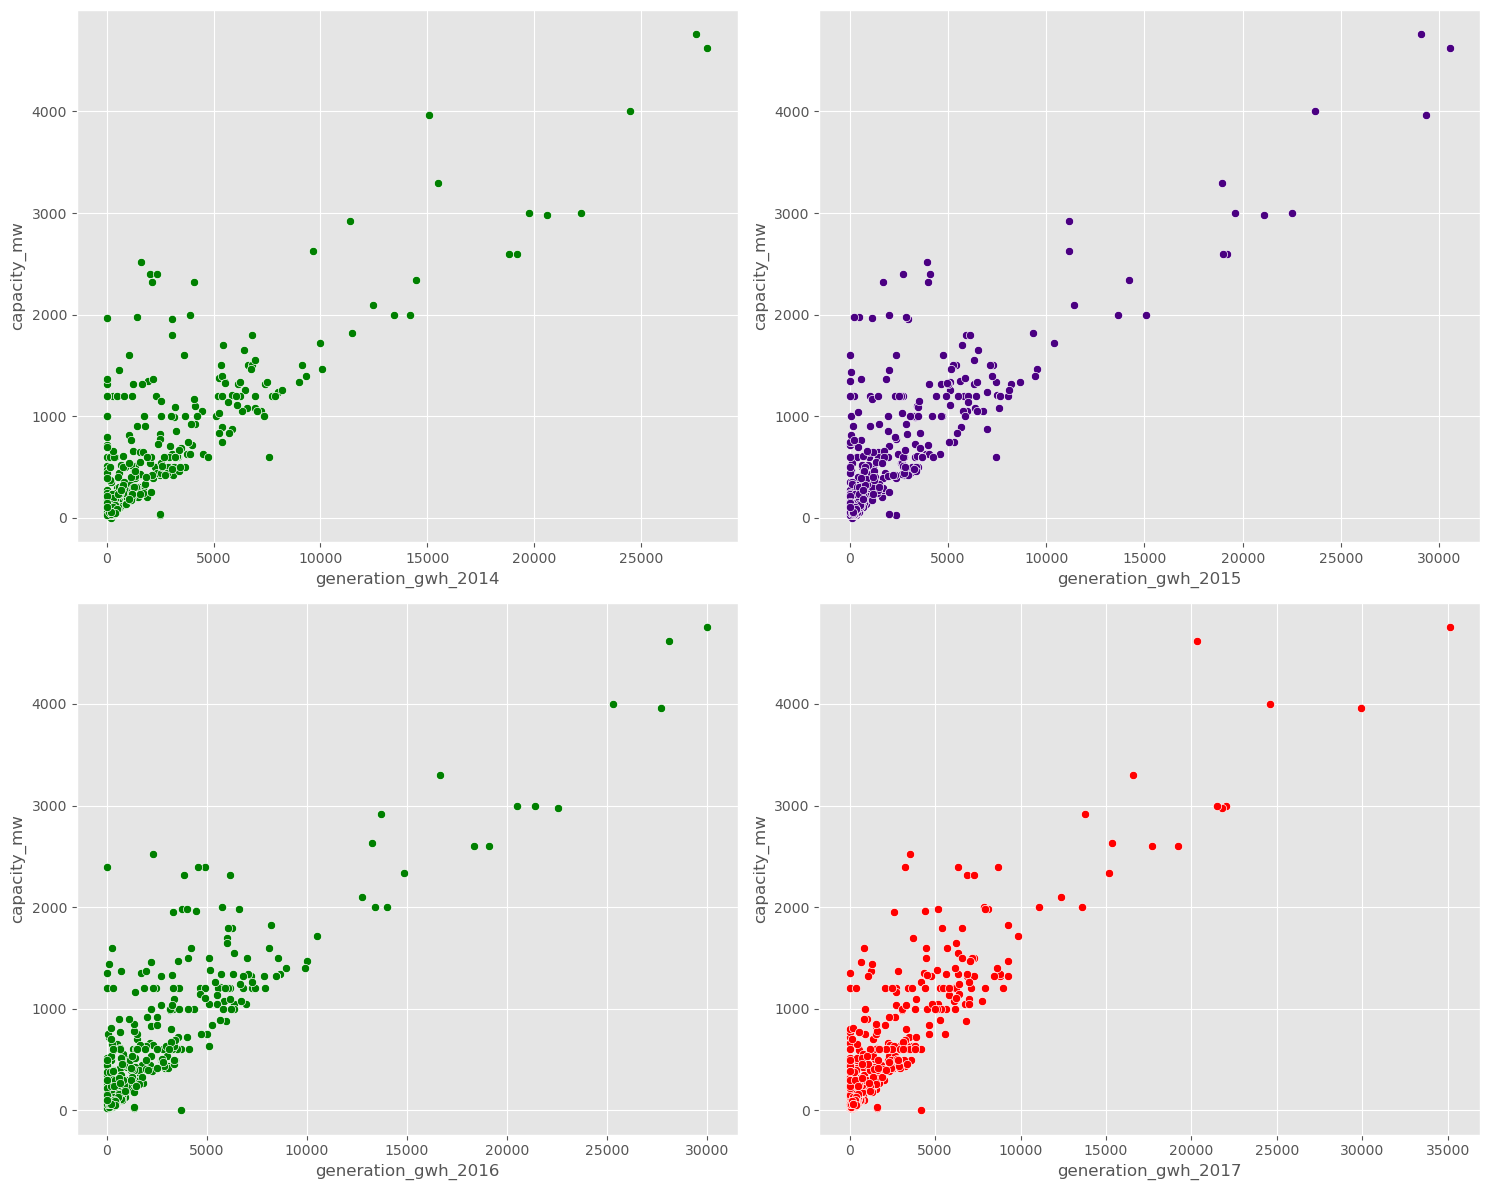

In [48]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.

As the electricity generation growth increases, the capacity of plant also increases.

## Encoding categorical data

In [49]:
df.drop(columns=['name'],axis=1,inplace=True)

In [50]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [51]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [52]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,Power_plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,3.0


## Outliers detection and removal

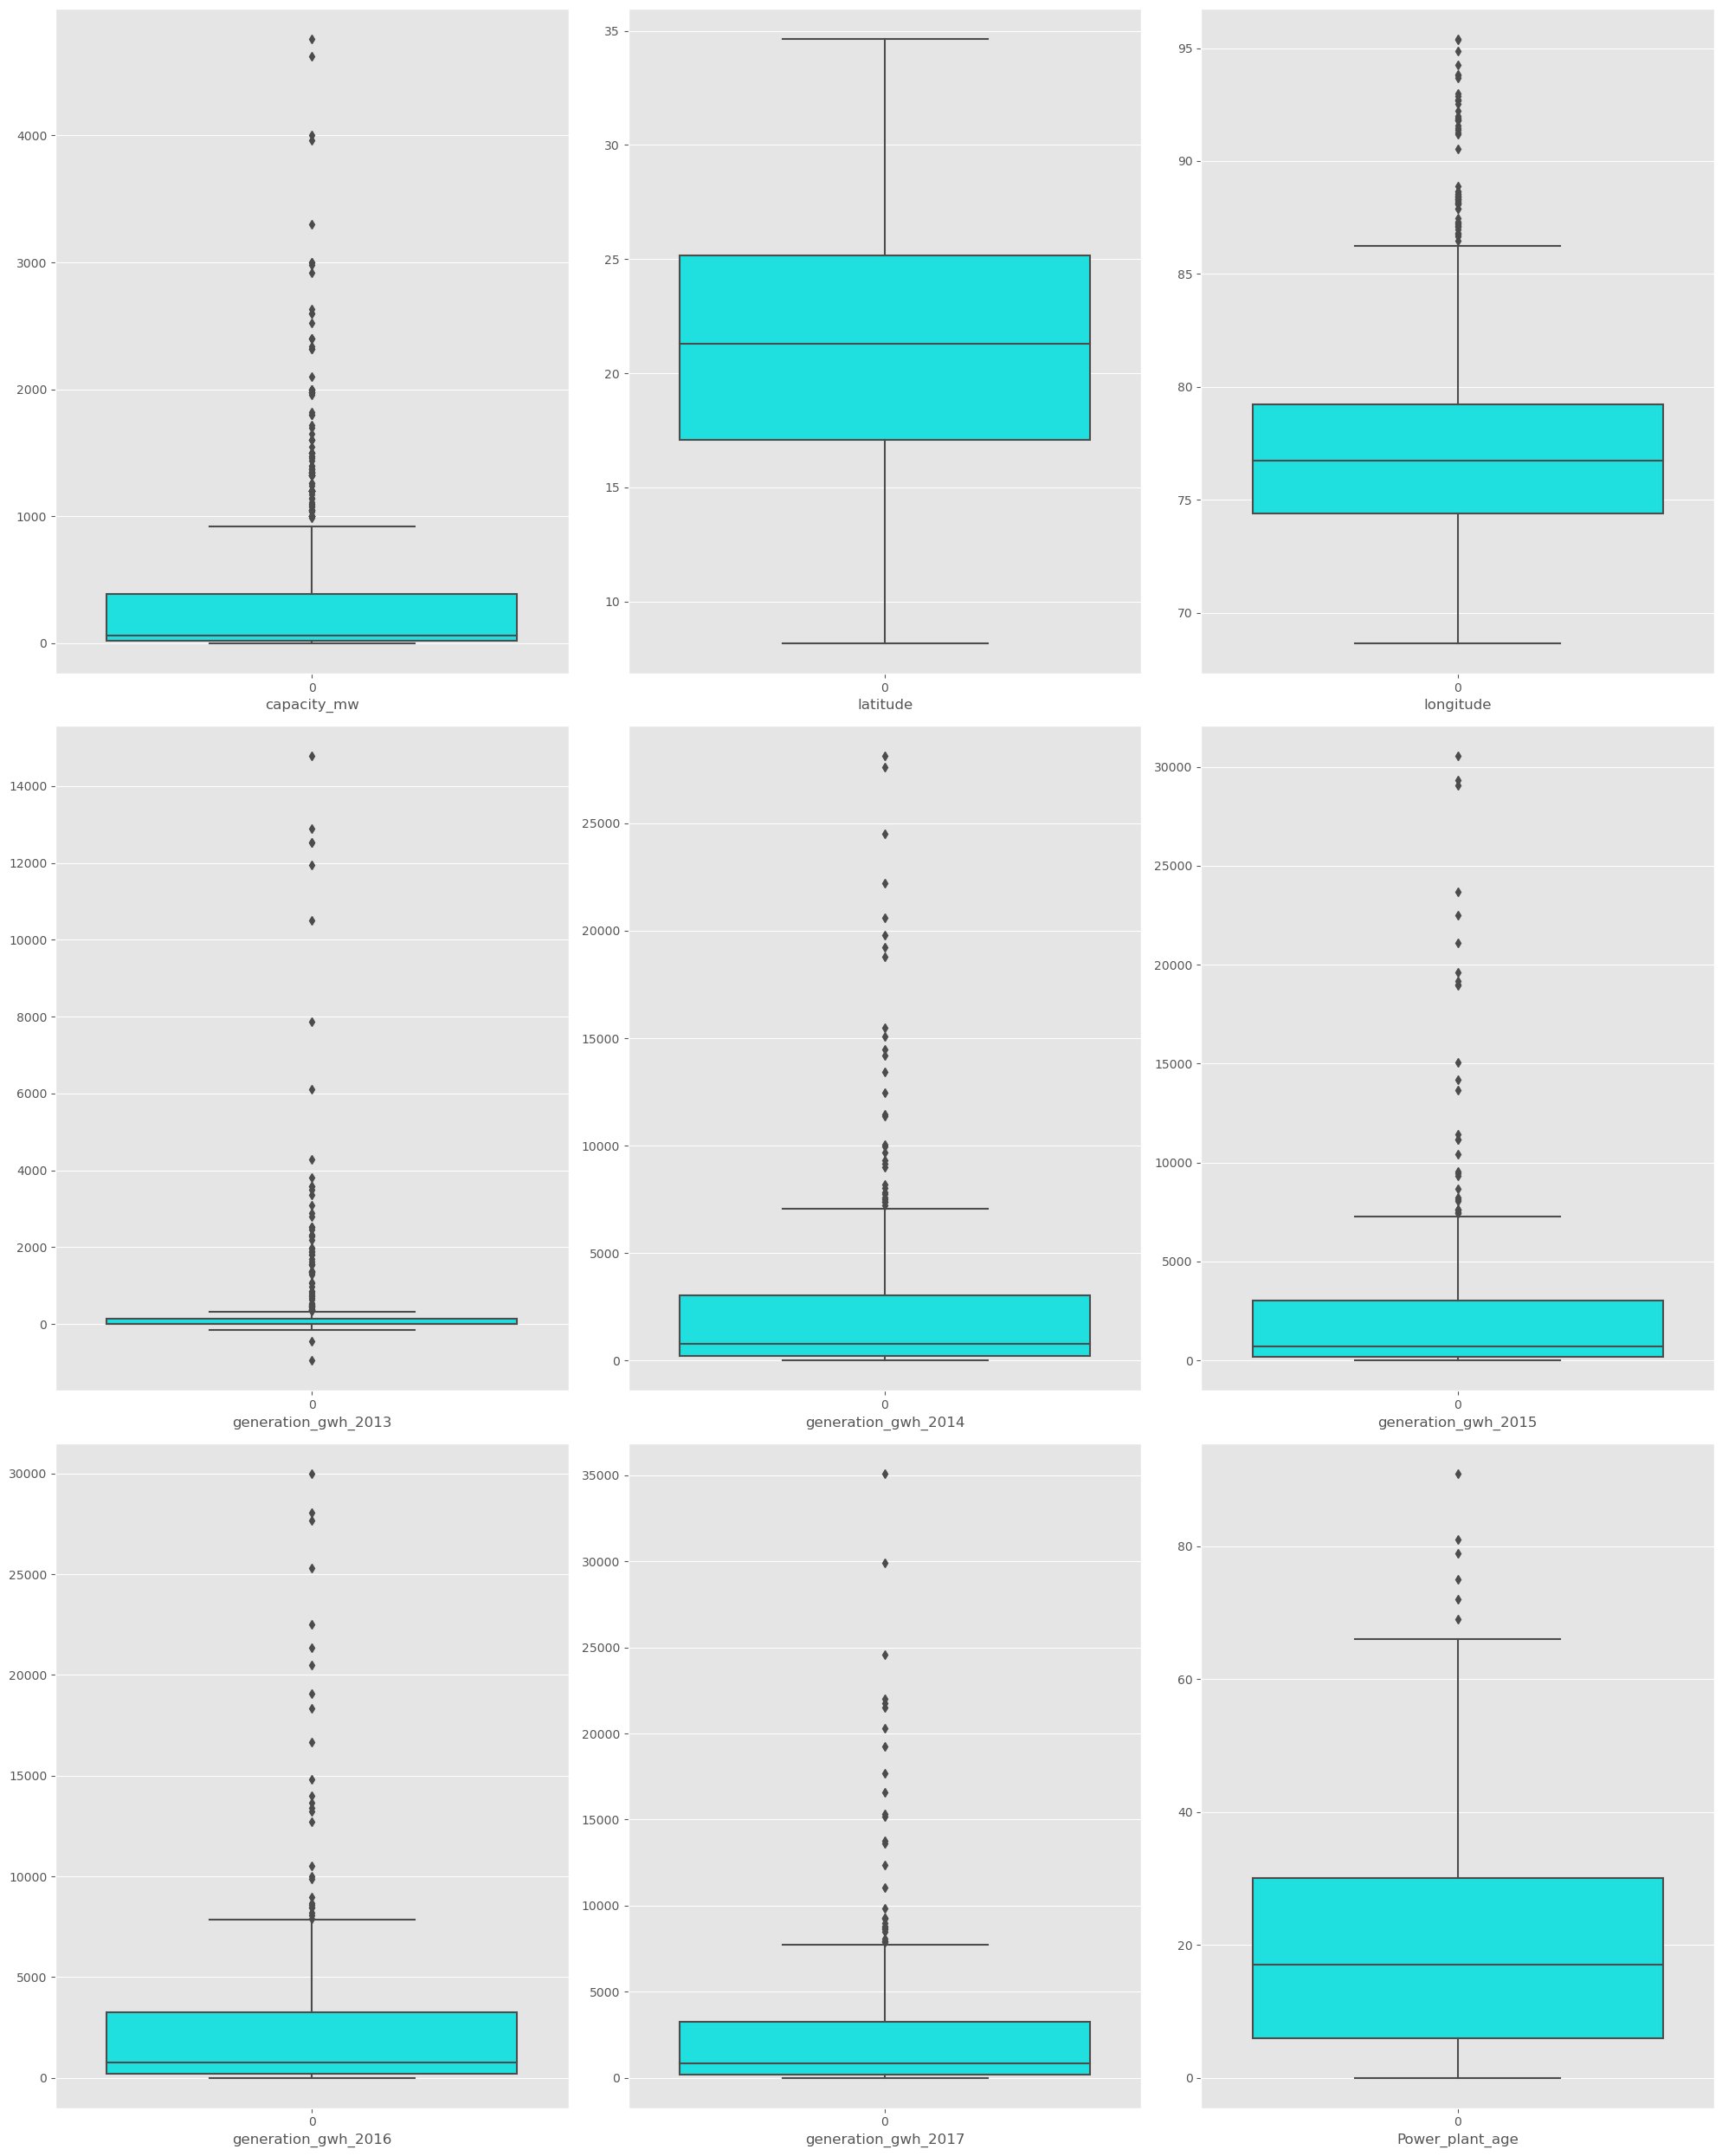

In [53]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

There outliers exist in data.

There are no outliers in lower capping level.

So we will use Quantile-based Flooring and Capping technique.

### Data Loss

In [65]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


In [68]:
df.drop("other_fuel1",axis=1,inplace=True)

In [72]:
df['Power_plant_age'] = df['Power_plant_age'].fillna(df['Power_plant_age'].mean())

In [73]:
df.drop("generation_gwh_2013",axis=1,inplace=True)
df.drop("generation_gwh_2014",axis=1,inplace=True)
df.drop("generation_gwh_2015",axis=1,inplace=True)
df.drop("generation_gwh_2016",axis=1,inplace=True)
df.drop("generation_gwh_2017",axis=1,inplace=True)
df.drop("generation_gwh_2018",axis=1,inplace=True)
df.drop("generation_gwh_2019",axis=1,inplace=True)

## Standard Scaling

In [74]:
# Splitting data in target and dependent feature
X = df.drop(['primary_fuel'], axis =1)
Y = df['primary_fuel']

In [75]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (634, 4)
Training target vector size: (634,)
Test feature matrix size: (273, 4)
Test target vector size: (273,)


## Finding best Random state

In [77]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.6043956043956044 on Random_state 152


## Logistics Regression Model

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.5018315018315018


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  5  0  0  1  6]
 [ 0 45  0 18  0  0  4  3]
 [ 0  7  0  7  0  0  0  5]
 [ 0 18  0 45  0  0  4 11]
 [ 0  1  0  1  0  0  0  0]
 [ 0  1  0  5  0  0  0  3]
 [ 0  1  0 10  0  0 22 19]
 [ 0  0  0  3  0  0  3 25]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.64      0.63        70
           2       0.00      0.00      0.00        19
           3       0.48      0.58      0.52        78
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.65      0.42      0.51        52
           7       0.35      0.81      0.49        31

    accuracy                           0.50       273
   macro avg       0.26      0.31      0.27       

## Decision Tree Classifier

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6446886446886447


Confusion matrix of DecisionTreeClassifier : 
 [[ 8  2  0  1  0  0  0  1]
 [ 0 39  8  8  2  2  4  7]
 [ 0  5  7  4  0  1  0  2]
 [ 0 11  5 56  1  2  0  3]
 [ 0  0  0  1  1  0  0  0]
 [ 0  0  2  4  0  3  0  0]
 [ 1  2  1  1  0  0 39  8]
 [ 2  1  1  0  0  0  4 23]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.73      0.67      0.70        12
           1       0.65      0.56      0.60        70
           2       0.29      0.37      0.33        19
           3       0.75      0.72      0.73        78
           4       0.25      0.50      0.33         2
           5       0.38      0.33      0.35         9
           6       0.83      0.75      0.79        52
           7       0.52      0.74      0.61        31

    accuracy                           0.64       273
   macro avg       0.55      0.58      0.5

## Random Forest Classifier

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7582417582417582


Confusion matrix of RandomForestClassifier : 
 [[ 7  1  0  1  0  0  2  1]
 [ 0 50  4  7  0  1  3  5]
 [ 0  6  9  3  0  0  0  1]
 [ 0  5  2 71  0  0  0  0]
 [ 0  1  0  1  0  0  0  0]
 [ 0  0  1  6  0  2  0  0]
 [ 1  2  0  1  0  0 42  6]
 [ 3  0  0  0  0  0  2 26]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.64      0.58      0.61        12
           1       0.77      0.71      0.74        70
           2       0.56      0.47      0.51        19
           3       0.79      0.91      0.85        78
           4       0.00      0.00      0.00         2
           5       0.67      0.22      0.33         9
           6       0.86      0.81      0.83        52
           7       0.67      0.84      0.74        31

    accuracy                           0.76       273
   macro avg       0.62      0.57      0.5

## ExtraTreesClassifier()

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.7472527472527473


Confusion matrix of ExtraTreesClassifier : 
 [[ 7  3  0  1  0  0  0  1]
 [ 0 50  4  8  0  0  3  5]
 [ 0  6  9  3  0  0  0  1]
 [ 1  4  6 66  0  0  0  1]
 [ 0  0  0  1  1  0  0  0]
 [ 0  0  1  5  0  3  0  0]
 [ 1  4  0  0  0  0 42  5]
 [ 3  1  0  0  0  0  1 26]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        12
           1       0.74      0.71      0.72        70
           2       0.45      0.47      0.46        19
           3       0.79      0.85      0.81        78
           4       1.00      0.50      0.67         2
           5       1.00      0.33      0.50         9
           6       0.91      0.81      0.86        52
           7       0.67      0.84      0.74        31

    accuracy                           0.75       273
   macro avg       0.77      0.64      0.67       

## Crossvalidation

In [84]:
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('=========================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.53846154 0.47802198 0.52486188 0.53038674 0.50276243]
Mean Score : 0.5148989132414548
Std deviation : 0.021915899821335273




Cross Validation Score DecisionTreeClassifier() :

Score : [0.70879121 0.68131868 0.70165746 0.70718232 0.62983425]
Mean Score : 0.6857567846518122
Std deviation : 0.02962936344172456




Cross Validation Score RandomForestClassifier() :

Score : [0.73076923 0.78021978 0.79558011 0.79005525 0.74585635]
Mean Score : 0.7684961447392386
Std deviation : 0.025579913882103313




Cross Validation Score ExtraTreesClassifier() :

Score : [0.75824176 0.74175824 0.8121547  0.77900552 0.77348066]
Mean Score : 0.77292817679558
Std deviation : 0.02350836004477545




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score. we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Final Classification Model

In [86]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features=1)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.7509157509157509


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

## Standard Scaling

In [93]:
# Splitting data in target and dependent feature
X = df.drop(['capacity_mw'], axis =1)
Y = df['capacity_mw']

In [94]:
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (607, 4)
Training target vector size: (607,)
Test feature matrix size: (300, 4)
Test target vector size: (300,)


In [98]:
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.2884211475404621 on Random_state 470


## Linear Regression

In [99]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ -43.41868511  236.73846862  405.28529268  564.38139834  -39.92088004
  586.36299504  604.93413392  505.21347042   16.07490229  563.1215013
  324.66745573  571.60576502    5.39252308  117.69026897  346.342784
   28.46267783  152.16039854  557.88304855  -18.35309858  511.687915
  515.29106539   54.1078733   645.98013396 -235.7731298   467.89760806
  113.65895955   60.14716687   21.50209514   43.67201646  544.51578785
  459.73214481  145.58764408   23.04539708  595.00500444  547.64214565
  464.0477165  -195.17341105  477.67183787  736.79290781  -38.36081229
  129.12535571  767.21039036  105.10736442  378.40597953   60.06052147
  579.35411157  695.04476868  -18.35309858   23.98938015  633.79451851
  436.38310655  758.70571711  574.55428677  600.8489967   745.89332321
  503.16955031  539.9106946   507.33905432  -49.24308376  105.09477321
  -62.77755846  485.99634812  110.50569678  166.3476559   -37.45277089
  243.89063579  542.17635776  584.93036006   82.12466029  331.126

In [101]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 309.6122860761099
Mean squared error : 202752.54353637493
Root Mean Squared Error: 450.28051649652235


 R2 Score :
0.2247737374354024


## Applying other ML Models

In [104]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('===============================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 202.0607553394261
Mean squared error : 138956.52066927069
Root Mean Squared Error: 372.7687227615411


 R2 Score :
0.4686984325891187


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 309.6114762948891
Mean squared error : 202752.28933159707
Root Mean Squared Error: 450.2802342226417


 R2 Score :
0.2247747093897683


 Error of  DecisionTreeRegressor() :
Mean absolute error : 253.86524664224663
Mean squared error : 261067.9288604432
Root Mean Squared Error: 510.9480686532079


 R2 Score :
0.001804311620621779


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 218.16620368215837
Mean squared error : 147702.23391843846
Root Mean Squared Error: 384.32048334487513


 R2 Score :
0.43525911549173446


 Error of  GradientBoostingRegressor() :
Mean absolute error : 219.45320440689156
Mean squared error : 142095.27093915307
Root Mean Squared Error: 376.955263843275


 R2 Score :
0.45669739132766585


 Error

In [105]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('======================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.3119495884277212


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.174430087869274


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.13415895843798023


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.3365294983757209


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.3521104152259156


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_d

Among all Model Random Forest Regressor gave us maximum R2 score and minimum RMSE value.

# Final Regression Model

In [108]:
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'squared_error', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 213.92577461493505
Mean squared error : 139275.2975572219
Root Mean Squared Error: 373.19605779967975


 R2 Score of Final Model :
0.4674795861513472




 True Values Vs Predicted Value plot :


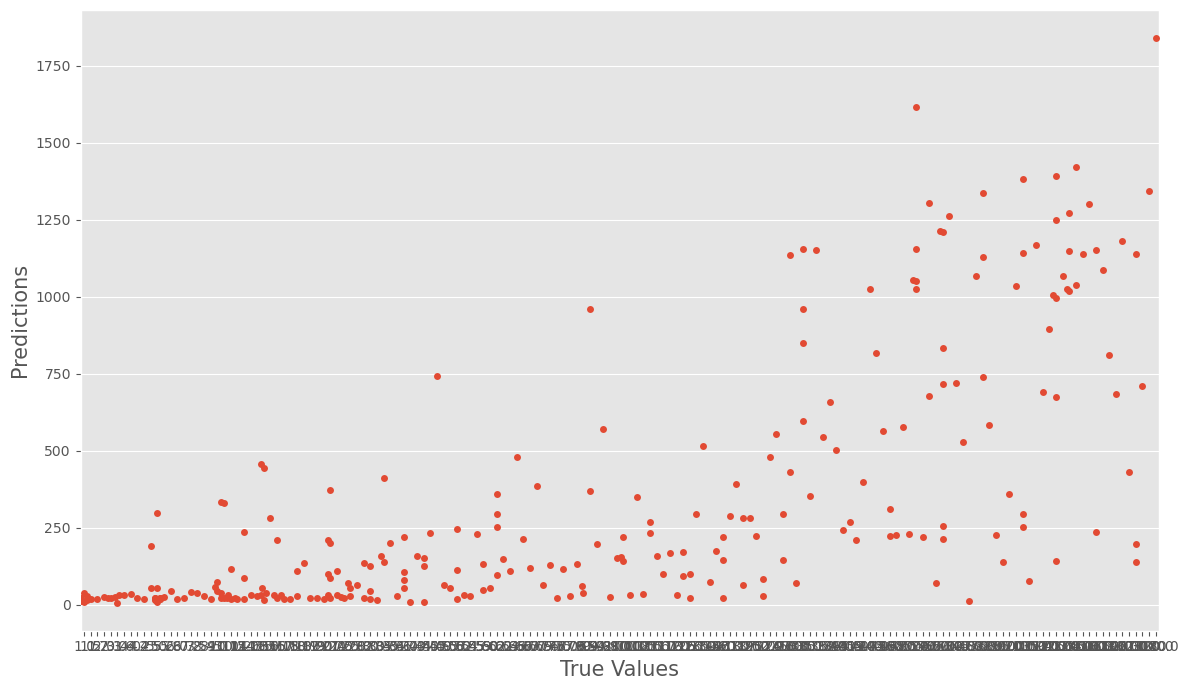

In [110]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(x=Y_test.round(2), y=y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()